In [1]:
import torch
from torch import nn
import d2l.torch as d2l

In [2]:
# 画一条正弦曲线
T = 1000
x = torch.arange(1, T + 1, dtype=torch.float32) # T * 1
y = torch.sin(x * 0.01) + torch.normal(0, 0.1, (T, )) # T * 1

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


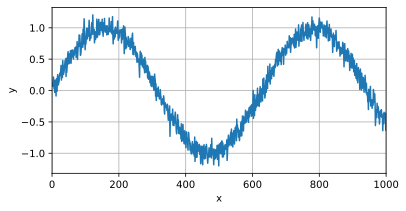

In [3]:
d2l.plot(x, [y], xlabel="x", ylabel="y", xlim=[0, 1000], figsize=(6, 3))

In [4]:
tau = 4
features = torch.zeros((T - tau, tau)) # T - tau * tau
for i in range(tau):
    features[:, i] = y[i: T - tau + i] # 0-996, 1-997, 2-998, 3-999
labels = y[tau:].reshape((-1, 1)) # 原来这里弄错了 996 * 1

In [5]:
labels.shape

torch.Size([996, 1])

In [6]:
batch_size, n_train = 16, 600

- 生成迭代器  
for x in range(0, n_train, batch_size):  
    yield features[x: batch_size + x], labels[x: x + batch_size] # 迭代器

In [7]:
train_iter = d2l.load_array((features[: n_train], labels[: n_train]), batch_size, is_train=True) # use the front n number to generate batch data

In [8]:
def init_weights(m):
    if type == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
    
def get_net(): # 4 * 10 10 * 1
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

In [9]:
def train(epochs, train_iter, net, loss, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for x, y in train_iter:
            trainer.zero_grad()
            l = loss(net(x), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch{epoch+1},'f'loss:{d2l.evaluate_loss(net, train_iter, loss):f}')

In [10]:
net = get_net()
loss = nn.MSELoss(reduction='none')
train(20, train_iter, net, loss, 0.01)

epoch1,loss:0.032490
epoch2,loss:0.016093
epoch3,loss:0.013047
epoch4,loss:0.013337
epoch5,loss:0.012698
epoch6,loss:0.012523
epoch7,loss:0.012514
epoch8,loss:0.013138
epoch9,loss:0.012263
epoch10,loss:0.012245
epoch11,loss:0.011968
epoch12,loss:0.012709
epoch13,loss:0.011951
epoch14,loss:0.011750
epoch15,loss:0.012080
epoch16,loss:0.014450
epoch17,loss:0.012713
epoch18,loss:0.017169
epoch19,loss:0.012386
epoch20,loss:0.013093


/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


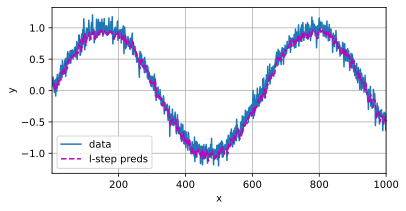

In [11]:
onestep_preds = net(features)
d2l.plot([x, x[tau:]], 
         [y.detach().numpy(), onestep_preds.detach().numpy()],
          'x', 'y', 
          legend=['data', 'l-step preds'], xlim=[1, 1000],
          figsize=(6, 3))

In [12]:
torch.zeros?

Docstring:
zeros(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `0`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword args:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_tensor_type`). :attr:`devi

In [13]:
max_steps = 64 # 通过指定步长来确定预测效率

In [14]:
features = torch.zeros((T - tau - max_steps + 1, tau + max_steps)) # T - tau - max_steps + 1 * 68 覆盖
# 列i（i<tau）是来⾃x的观测，其时间步从（i+1）到（i+T-tau-max_steps+1）
features.shape

torch.Size([933, 68])

In [15]:
for i in range(tau): # error
    features[:, i] = x[i: i + T - tau - max_steps + 1] # 上限 0 * T - n、1 * T - n
features.shape

torch.Size([933, 68])

In [16]:
multistep_preds = torch.zeros(T) # 其实这里值生成剩余部分即可
multistep_preds[: n_train + tau] = y[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(multistep_preds[i - tau: i]) # 添加reshape((1, -1) 预测/不用predict

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


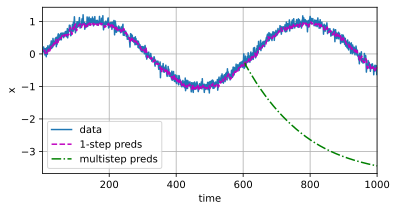

In [17]:
d2l.plot([x, x[tau:], x[n_train+tau:]],
         [y.detach().numpy(), 
          onestep_preds.detach().numpy(),
          multistep_preds[n_train+tau:].detach().numpy()],
         'time','x', legend=['data','1-step preds','multistep preds'],
         xlim=[1,1000], figsize=(6,3))

In [18]:
# 列i（i>=tau）是来⾃（i-tau+1）步的预测，其时间步从（i+1）到（i+T-tau-max_steps+1）
for i in range(tau, tau + max_steps):
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)
features.shape

torch.Size([933, 68])

- 文本预处理

In [19]:
import collections
import re

In [20]:
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt', 
                                '090b5e7e70c295757f55df93cb0a180b9691891a')
def read_time_machine() -> list:
    with open(d2l.download('time_machine'), 'r') as f:
        lines = f.readlines()
    f.close()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]


In [21]:
lines = read_time_machine() # 一维list
print(f'#文本总行数：{len(lines)}')
print(lines[10])

#文本总行数：3221
twinkled and his usually pale face was flushed and animated the


In [22]:
# tmp = read_time_machine()
# tmp_tokens = d2l.tokenize(tmp)
# tmp_corpus = [token for line in tmp_tokens for token in line]
# tmp_corpus


In [23]:
# 将每个单词分开
def tokenize(lines, token='word'):
    if token == 'word':
        tokens = [line.split() for line in lines] # 可以直接split 字符串遍历
    if token == 'char':
        tokens = [list(line) for line in lines]
    return tokens

In [24]:
tokens = tokenize(lines, token='word') # 二维列表
tokens[0]

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']

- 8.2.3 此表构建

In [25]:
# 建立词表
class Vocab:
    """
        --args: reserved_tokens 已有tokens
    """
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None: # is 判断是否同一个地址 == 判断值是否相等
            reserved_tokens = []
            
        counter = count_corps(tokens)
        self._token_freqs = sorted(counter.items(), key = lambda x: x[1], reverse=True)
        
        # 未知词元索引 根据词找到id, 根据id找到tokens
        self.idx_to_token = ['<unk>'] + reserved_tokens # 已经保存的值
        self.token_to_idx = {token: idx
                                for idx, token in enumerate(self.idx_to_token)}
        for token, freq in self._token_freqs: # add token more than freqs in the original vocabilt
            if freq < min_freq:
                break # 结束这次循环？ 这已经排过序了
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
    def __len__(self):
        return len(self.idx_to_token)
    
    def __getitem__(self, tokens): # 得到样例
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]
        
    def to_tokens(self, indices): # 根据索引找到token
        if not isinstandce(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]
    
    @property
    def unk(self):
        return 0
    @property
    def token_freqs(self): # 设置为属性方法
        return self._token_freqs

# 统计词出现的频数
def count_corps(tokens):
    if len(tokens) == 0 or isinstance(tokens[0], list):
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)


In [26]:
vocab=Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('was', 7), ('in', 8), ('that', 9)]


In [27]:
def load_corpus_time_machine(max_tokens=-1): #@save
    """返回时光机器数据集的词元索引列表和词表"""
    lines = read_time_machine()
    tokens = tokenize(lines, 'char')
    vocab = Vocab(tokens)
    # 因为时光机器数据集中的每个⽂本⾏不⼀定是⼀个句⼦或⼀个段落，
    # 所以将所有⽂本⾏展平到⼀个列表中
    corpus = [vocab[token] for line in tokens for token in line]
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus, vocab
corpus, vocab = load_corpus_time_machine()
len(corpus), len(vocab)

(170580, 28)

- 8.3.3 自然语言统计

In [28]:
import random

In [29]:
tokens = d2l.tokenize(d2l.read_time_machine()) # 二维列表（句子变单词） 并没有运行上面load_corpus_time_machine方法
corpus = [token for line in tokens for token in line]
corpus

['the',
 'time',
 'machine',
 'by',
 'h',
 'g',
 'wells',
 'i',
 'the',
 'time',
 'traveller',
 'for',
 'so',
 'it',
 'will',
 'be',
 'convenient',
 'to',
 'speak',
 'of',
 'him',
 'was',
 'expounding',
 'a',
 'recondite',
 'matter',
 'to',
 'us',
 'his',
 'grey',
 'eyes',
 'shone',
 'and',
 'twinkled',
 'and',
 'his',
 'usually',
 'pale',
 'face',
 'was',
 'flushed',
 'and',
 'animated',
 'the',
 'fire',
 'burned',
 'brightly',
 'and',
 'the',
 'soft',
 'radiance',
 'of',
 'the',
 'incandescent',
 'lights',
 'in',
 'the',
 'lilies',
 'of',
 'silver',
 'caught',
 'the',
 'bubbles',
 'that',
 'flashed',
 'and',
 'passed',
 'in',
 'our',
 'glasses',
 'our',
 'chairs',
 'being',
 'his',
 'patents',
 'embraced',
 'and',
 'caressed',
 'us',
 'rather',
 'than',
 'submitted',
 'to',
 'be',
 'sat',
 'upon',
 'and',
 'there',
 'was',
 'that',
 'luxurious',
 'after',
 'dinner',
 'atmosphere',
 'when',
 'thought',
 'roams',
 'gracefully',
 'free',
 'of',
 'the',
 'trammels',
 'of',
 'precision',


In [30]:
# 内置
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10] # 属性方法

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

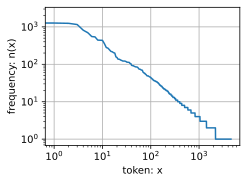

In [31]:
freqs=[freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',xscale='log', yscale='log')

In [32]:
corpus # 单个词列表

['the',
 'time',
 'machine',
 'by',
 'h',
 'g',
 'wells',
 'i',
 'the',
 'time',
 'traveller',
 'for',
 'so',
 'it',
 'will',
 'be',
 'convenient',
 'to',
 'speak',
 'of',
 'him',
 'was',
 'expounding',
 'a',
 'recondite',
 'matter',
 'to',
 'us',
 'his',
 'grey',
 'eyes',
 'shone',
 'and',
 'twinkled',
 'and',
 'his',
 'usually',
 'pale',
 'face',
 'was',
 'flushed',
 'and',
 'animated',
 'the',
 'fire',
 'burned',
 'brightly',
 'and',
 'the',
 'soft',
 'radiance',
 'of',
 'the',
 'incandescent',
 'lights',
 'in',
 'the',
 'lilies',
 'of',
 'silver',
 'caught',
 'the',
 'bubbles',
 'that',
 'flashed',
 'and',
 'passed',
 'in',
 'our',
 'glasses',
 'our',
 'chairs',
 'being',
 'his',
 'patents',
 'embraced',
 'and',
 'caressed',
 'us',
 'rather',
 'than',
 'submitted',
 'to',
 'be',
 'sat',
 'upon',
 'and',
 'there',
 'was',
 'that',
 'luxurious',
 'after',
 'dinner',
 'atmosphere',
 'when',
 'thought',
 'roams',
 'gracefully',
 'free',
 'of',
 'the',
 'trammels',
 'of',
 'precision',


In [33]:
bigram_tokens=[pair for pair in zip(corpus[:-1], corpus[1:])] # 顺序反正组合
bigram_tokens # 组合成一个词库

[('the', 'time'),
 ('time', 'machine'),
 ('machine', 'by'),
 ('by', 'h'),
 ('h', 'g'),
 ('g', 'wells'),
 ('wells', 'i'),
 ('i', 'the'),
 ('the', 'time'),
 ('time', 'traveller'),
 ('traveller', 'for'),
 ('for', 'so'),
 ('so', 'it'),
 ('it', 'will'),
 ('will', 'be'),
 ('be', 'convenient'),
 ('convenient', 'to'),
 ('to', 'speak'),
 ('speak', 'of'),
 ('of', 'him'),
 ('him', 'was'),
 ('was', 'expounding'),
 ('expounding', 'a'),
 ('a', 'recondite'),
 ('recondite', 'matter'),
 ('matter', 'to'),
 ('to', 'us'),
 ('us', 'his'),
 ('his', 'grey'),
 ('grey', 'eyes'),
 ('eyes', 'shone'),
 ('shone', 'and'),
 ('and', 'twinkled'),
 ('twinkled', 'and'),
 ('and', 'his'),
 ('his', 'usually'),
 ('usually', 'pale'),
 ('pale', 'face'),
 ('face', 'was'),
 ('was', 'flushed'),
 ('flushed', 'and'),
 ('and', 'animated'),
 ('animated', 'the'),
 ('the', 'fire'),
 ('fire', 'burned'),
 ('burned', 'brightly'),
 ('brightly', 'and'),
 ('and', 'the'),
 ('the', 'soft'),
 ('soft', 'radiance'),
 ('radiance', 'of'),
 ('of', 

In [34]:
bigram_vocab=d2l.Vocab(bigram_tokens) # 根据组合的词库映射词
bigram_vocab.token_freqs[:10] 

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73)]

In [35]:
trigram_tokens=[triple for triple in zip(corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab=d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13)]

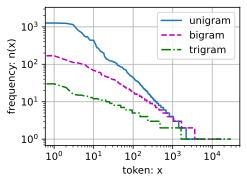

In [36]:
bigram_freqs=[freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs=[freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',ylabel='frequency: n(x)', xscale='log', yscale='log',legend=['unigram','bigram','trigram'])

- 8.3.4 读取长序列  
随机抽样  
对词表序列开始随机划分  
一维列表  

In [37]:
corpus[random.randint(0, 5): ]

['h',
 'g',
 'wells',
 'i',
 'the',
 'time',
 'traveller',
 'for',
 'so',
 'it',
 'will',
 'be',
 'convenient',
 'to',
 'speak',
 'of',
 'him',
 'was',
 'expounding',
 'a',
 'recondite',
 'matter',
 'to',
 'us',
 'his',
 'grey',
 'eyes',
 'shone',
 'and',
 'twinkled',
 'and',
 'his',
 'usually',
 'pale',
 'face',
 'was',
 'flushed',
 'and',
 'animated',
 'the',
 'fire',
 'burned',
 'brightly',
 'and',
 'the',
 'soft',
 'radiance',
 'of',
 'the',
 'incandescent',
 'lights',
 'in',
 'the',
 'lilies',
 'of',
 'silver',
 'caught',
 'the',
 'bubbles',
 'that',
 'flashed',
 'and',
 'passed',
 'in',
 'our',
 'glasses',
 'our',
 'chairs',
 'being',
 'his',
 'patents',
 'embraced',
 'and',
 'caressed',
 'us',
 'rather',
 'than',
 'submitted',
 'to',
 'be',
 'sat',
 'upon',
 'and',
 'there',
 'was',
 'that',
 'luxurious',
 'after',
 'dinner',
 'atmosphere',
 'when',
 'thought',
 'roams',
 'gracefully',
 'free',
 'of',
 'the',
 'trammels',
 'of',
 'precision',
 'and',
 'he',
 'put',
 'it',
 'to',

In [38]:
def seq_data_iter_random(corpus, batch_size, num_steps):
    
    corpus = corpus[random.randint(0, num_steps - 1): ] # 随机截断 t:n
    num_subseqs = (len(corpus) - 1) // num_steps # 长度为n，可以划分子序列个数
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps)) # 起初位置
    random.shuffle(initial_indices) # 打乱起始位置即打原有词片段
    
    def data(pos): # 根据起始位置得到数据
        return corpus[pos: pos + num_steps]
        
    num_batches = num_subseqs // batch_size # 每个迭代器存放batch_size个训练数据，共有num_batches组数据
    
    for i in range(0, batch_size * num_batches, batch_size): # 给这几个epoch
        initial_indices_per_batch = initial_indices[i: i + batch_size] # 从1开始的列表 i是随机的 找到batch_size个序列
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y) # 记录了一段序列索引 Y往前靠一个

In [39]:
my_seq = list(range(35))
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

X:  tensor([[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]) 
Y: tensor([[16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25]])
X:  tensor([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]) 
Y: tensor([[ 1,  2,  3,  4,  5],
        [11, 12, 13, 14, 15]])
X:  tensor([[ 5,  6,  7,  8,  9],
        [25, 26, 27, 28, 29]]) 
Y: tensor([[ 6,  7,  8,  9, 10],
        [26, 27, 28, 29, 30]])


- 顺序分裂 每个批次指定序列

In [40]:
def seq_data_iter_sequential(corpus, batch_size, num_steps):
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size # 取整
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1) # 自适应
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y

In [41]:
for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

X:  tensor([[ 2,  3,  4,  5,  6],
        [18, 19, 20, 21, 22]]) 
Y: tensor([[ 3,  4,  5,  6,  7],
        [19, 20, 21, 22, 23]])
X:  tensor([[ 7,  8,  9, 10, 11],
        [23, 24, 25, 26, 27]]) 
Y: tensor([[ 8,  9, 10, 11, 12],
        [24, 25, 26, 27, 28]])
X:  tensor([[12, 13, 14, 15, 16],
        [28, 29, 30, 31, 32]]) 
Y: tensor([[13, 14, 15, 16, 17],
        [29, 30, 31, 32, 33]])


In [42]:
def seq_data_sequential(corpus, batch_size, num_steps):
    num_subseqs = (len(corpus) - 1) // num_steps # 子序列个数
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))

In [43]:
class SeqDataLoader: #@save 万物皆可指针
    """加载序列数据的迭代器"""
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = d2l.seq_data_iter_random
        else:
            self.data_iter_fn = d2l.seq_data_iter_sequential
        self.corpus, self.vocab = d2l.load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps
        
    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

In [44]:
def load_data_time_machine(batch_size, num_steps, #@save
                           use_random_iter=False, max_tokens=10000):
    """返回时光机器数据集的迭代器和词表"""
    data_iter = SeqDataLoader(batch_size, num_steps, use_random_iter, max_tokens)
    return data_iter, data_iter.vocab

- 循环神经网络
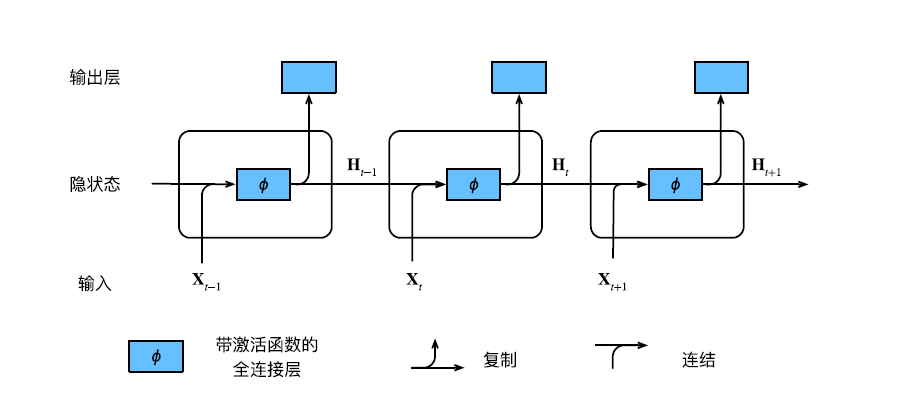

In [45]:
import torch
from d2l import torch as d2l

In [46]:
X, W_xh = torch.normal(0, 1, (3, 1)), torch.normal(0, 1, (1, 4))
H, W_hh = torch.normal(0, 1, (3, 4)), torch.normal(0, 1, (4, 4)) # W_hh也是1 * 4形状
torch.matmul(X, W_xh) + torch.matmul(H, W_hh) # 新的W_hh 合理性

tensor([[ 0.2639, -0.0496,  0.3555,  5.5644],
        [ 1.0061,  1.7715, -0.0069,  1.1595],
        [-0.3856,  2.3498, -0.7469, -0.3763]])

In [47]:
torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))

tensor([[ 0.2639, -0.0496,  0.3555,  5.5644],
        [ 1.0061,  1.7715, -0.0069,  1.1595],
        [-0.3856,  2.3498, -0.7469, -0.3763]])

- 8.5 循环神经网络从零开始实行

In [48]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

- 简洁实现

In [49]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [50]:
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [52]:
F.one_hot(torch.tensor([0, 2]), len(vocab))

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]])

- 8.5.2 初始化模型参数

In [56]:
# 权重系数
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size
    
    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01
    # 隐藏层参数
    W_xh = normal((num_inputs, num_hiddens)) # 所以层数权重矩阵
    W_hh = normal((num_hiddens, num_hiddens)) # num_hiddens指的是单个隐藏层的神经元个数
    b_h = torch.zeros(num_hiddens, device=device) # 每个隐藏层一个偏置
    # 输出层参数
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    # 附加梯度
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    
    for param in params:
        param.requires_grad_(True)
        
    return params

- 8.5.3 循环神经网络模型

In [60]:
def init_rnn_state(batch_size, num_hiddens, device): # 单个隐藏层
    return (torch.zeros((batch_size, num_hiddens), device=device), )

In [57]:
def rnn(inputs, state, params):
    # inputs的形状：(时间步数量，批量⼤⼩，词表⼤⼩)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    # X的形状：(批量⼤⼩，词表⼤⼩)
    for X in inputs:
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
        Y = torch.mm(H, W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H,)

In [62]:
class RNNModelScratch: #@save
    """从零开始实现的循环神经⽹络模型"""
    def __init__(self, vocab_size, num_hiddens, device,
        get_params, init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn
    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params)
    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens, device)

In [63]:
num_hiddens = 512
net = RNNModelScratch(len(vocab), num_hiddens, d2l.try_gpu(), get_params,
                      init_rnn_state, rnn)
state = net.begin_state(X.shape[0], d2l.try_gpu())
Y, new_state = net(X.to(d2l.try_gpu()), state)
Y.shape, len(new_state), new_state[0].shape

/tmp/ipykernel_11513/2502980767.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = F.one_hot(torch.tensor(X.T), self.vocab_size).type(torch.float32)


RuntimeError: one_hot is only applicable to index tensor.

In [55]:
torch.randn(size=(10, ))

tensor([ 0.0342, -0.8880,  0.5325,  1.9884, -0.5684, -1.3742,  1.3946, -0.9922,
        -1.1345,  0.3738])

In [ ]:
num_hiddens = 256
rnn_layer = nn.RNN(len(vocab), num_hiddens)

In [ ]:
state = torch.zeros((1, batch_size, num_hiddens)) # 隐状态
state.shape

In [ ]:
X = torch.rand(size=(num_steps, batch_size, len(vocab)))
Y, state_new = rnn_layer(X, state) # X是输入的现有词 (时间步数量， 批量大小， 词表大小）num_steps * batch_size * (num)
Y.shape, state_new.shape

- 8.6 简洁实现

In [65]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [66]:
num_hiddens = 256
rnn_layer = nn.RNN(len(vocab), num_hiddens)

In [67]:
state = torch.zeros((1, batch_size, num_hiddens))
state.shape

torch.Size([1, 32, 256])

In [68]:
X = torch.rand(size=(num_steps, batch_size, len(vocab)))
Y, state_new = rnn_layer(X, state)
Y.shape, state_new.shape

(torch.Size([35, 32, 256]), torch.Size([1, 32, 256]))

In [78]:
class RNNModel(nn.Module):
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        self.num_directions = 1
        self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        # if not self.rnn.bidrectional:
        #     self.num_directions = 1
        #     self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        # else:
        #     self.num_directions = 2
        #     self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)
            
    def foward(self, input, state):
        X = F.one_hot(input.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.rnn(X, state)
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        return output, state
        
    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            return torch.zeros((self.num_directions * self.rnn.num_layers,
                                batch_size, self.num_hiddens),
                               device=device)
        else:
            # nn.LSTM以元组作为隐状态
            return (torch.zeros((self.num_directions * self.rnn.num_layers, 
                                 batch_size, self.num_hiddens), device=device),
                    torch.zeros((self.num_directions * self.rnn.num_layers,
                                 batch_size, self.num_hiddens), device=device))

In [79]:
device = d2l.try_gpu()
net = RNNModel(rnn_layer, vocab_size=len(vocab))
net = net.to(device)
d2l.predict_ch8('time traveller', 10, net, vocab, device)

NotImplementedError: Module [RNNModel] is missing the required "forward" function